# Kaggle数据集"Airplane Crashes Since 1908"分析学习

> 数据来源:https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from pylab import *
plt.rcParams['font.sans-serif']=['simhei']    #设置中文显示
plt.rcParams['axes.unicode_minus']=False    #设置负号的显示
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)    #设置图片大小

In [27]:
%matplotlib inline

In [5]:
ac = pd.read_csv('./Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [8]:
ac.head(1)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."


## `kaggle`案例:Who not to fly with...

kaggle上的一个经典分析案例学习.

>https://www.kaggle.com/garydee/who-not-to-fly-with

In [10]:
operator = ac[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])
operator[:5]

Fatalities      
                         sum count
Operator                          
A B Aerotransport        3.0     2
AB Aerotransport        58.0     3
ACES Colombia           40.0     3
ADC Airlines            97.0     2
ADES Colombia           22.0     2

### 针对航空公司的数据分析和整理

`ac[['Operator','Fatalities']]` 筛选出了全部的operator和fatalities,即航空公司和死亡人数

`.groupby('Operator')`则对前面的数据进行分组, 形成了一个通过operator进行分类的对象

`agg` is an alias for aggregate. Use the alias.

A passed user-defined-function will be passed a Series for evaluation.

**Examples**
```python
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, np.nan]],
                  columns=['A', 'B', 'C'])
```
Aggregate these functions over the rows.
```python
df.agg(['sum', 'min'])
        A     B     C
sum  12.0  15.0  18.0
min   1.0   2.0   3.0
```
Different aggregations per column.
```python
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})
        A    B
max   NaN  8.0
min   1.0  2.0
sum  12.0  NaN
```
Aggregate over the columns.
```python
df.agg("mean", axis="columns")
0    2.0
1    5.0
2    8.0
3    NaN
dtype: float64
```

Examples

```python 
df = pd.DataFrame({'A': [1, 1, 2, 2],
                      'B': [1, 2, 3, 4],
                      'C': np.random.randn(4)})
df
   A  B         C
0  1  1  0.362838
1  1  2  0.227877
2  2  3  1.267767
3  2  4 -0.562860
```
The aggregation is for each column.
```python
df.groupby('A').agg('min')
   B         C
A
1  1  0.227877
2  3 -0.562860
```
Multiple aggregations
```python
df.groupby('A').agg(['min', 'max'])
    B             C
  min max       min       max
A
1   1   2  0.227877  0.362838
2   3   4 -0.562860  1.267767
```
Select a column for aggregation
```python
df.groupby('A').B.agg(['min', 'max'])
   min  max
A
1    1    2
2    3    4
```
Different aggregations per column
```python
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
    B             C
  min max       sum
A
1   1   2  0.590716
2   3   4  0.704907
```

`agg`可以一次传递多个计算的参数, 比如: sum,max,min,mean,count

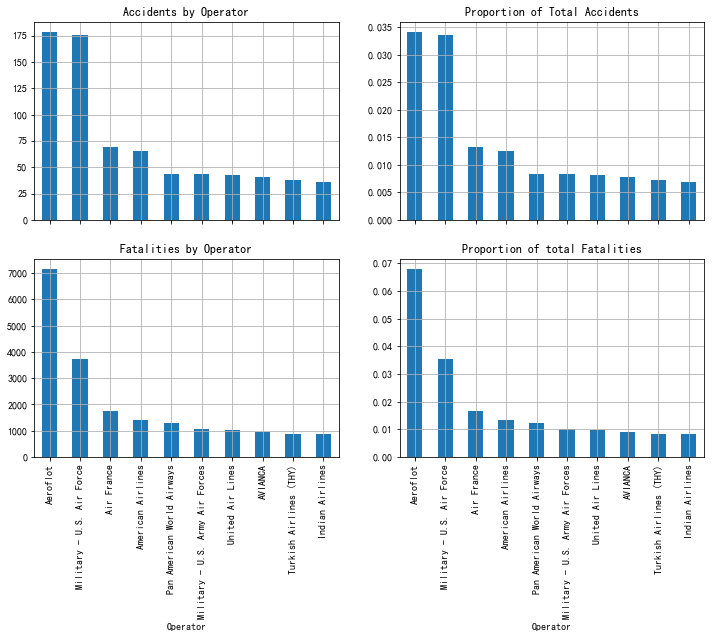

In [30]:
#设置图像空间为2*2,并分别命名为ax1-ax4
#ax1|ax2
#ax3|ax4
fig_ops,((ax1, ax2), (ax3, ax4))=plt.subplots(2,2,sharex=True)
#做了一次accident的分析
accidents = operator['Fatalities','count'].sort_values(ascending=False)
totalacc = accidents.sum()
accprop = accidents/totalacc
accidents.head(10).plot(kind='bar',title='Accidents by Operator',ax=ax1,grid=True,rot=90)
accprop.head(10).plot(kind='bar',title='Proportion of Total Accidents',ax=ax2,grid=True,rot=90)
fatalities = operator['Fatalities','sum'].sort_values(ascending=False)
fatalities.head(10).plot(kind='bar',title='Fatalities by Operator',ax=ax3,grid=True,rot=90)
totalfatal = fatalities.sum()
fatalprop = fatalities/totalfatal
fatalprop.head(10).plot(kind='bar',title='Proportion of total Fatalities',ax=ax4,grid=True,rot=90)

In [31]:
props = operator['Fatalities'].reset_index()    #reset_index将index列还原为普通数据列
props

,Operator,sum,count
0,A B Aerotransport,3.0,2
1,AB Aerotransport,58.0,3
2,ACES Colombia,40.0,3
3,ADC Airlines,97.0,2
4,ADES Colombia,22.0,2
5,AECA Cargo,4.0,1
6,AIDA,14.0,1
7,AIRES Colombia,27.0,2
8,ALADA,16.0,1
9,ALFA,18.0,1
